In [13]:
import pandas as pd
import ast
from fastapi import FastAPI
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV



### Importar el archivo ##############################################
df = pd.read_csv("dataset_Transformado.csv", sep=";")


In [14]:

#Filtrado por variables de interes
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
variable_de_interes = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average']
X = df[variable_de_interes]



imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Paso 5: Construir el modelo de k-NN
model = NearestNeighbors()
model.fit(X_scaled)


# Funcion dentro del boton

def recomendacion(titulo: str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
    
    # Indice de la película según el título
    movie_index = df[df['title'] == titulo].index[0]

    X_movie = X_scaled[movie_index].reshape(1, -1)

    distances, indices = model.kneighbors(X_movie)
    recommended_movies = df.iloc[indices[0]]['title'].tolist()

    respuesta = {'1': str(recommended_movies[0]), '2': str(recommended_movies[1]), '3': str(
        recommended_movies[2]), '4': str(recommended_movies[3]), '5': str(recommended_movies[4])}

    return {'lista recomendada': respuesta}



### Prueba de ejemplo ###

In [15]:
recomendacion(titulo="Toy Story")

{'lista recomendada': {'1': 'Toy Story',
  '2': 'Beauty and the Beast',
  '3': 'Gran Torino',
  '4': 'Raiders of the Lost Ark',
  '5': 'Aladdin'}}

### Entrenamiento ###

In [19]:
# Búsqueda de hiperparámetros utilizando Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'metric': ['manhattan', 'euclidean']}

model = KNeighborsRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5)

# Con X_scaled como variable objetivo para adaptar el modelo
grid_search.fit(X_scaled, X_scaled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores hiperparámetros encontrados:", best_params)
print("Modelo con mejores hiperparámetros:", best_model)


Mejores hiperparámetros encontrados: {'metric': 'euclidean', 'n_neighbors': 3}
Modelo con mejores hiperparámetros: KNeighborsRegressor(metric='euclidean', n_neighbors=3)


c:\Users\Martin\Desktop\Proyecto-1\Proyecto-1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Martin\Desktop\Proyecto-1\Proyecto-1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Martin\Desktop\Proyecto-1\Proyecto-1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Martin\Desktop\Proyecto-1\Proyecto-1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

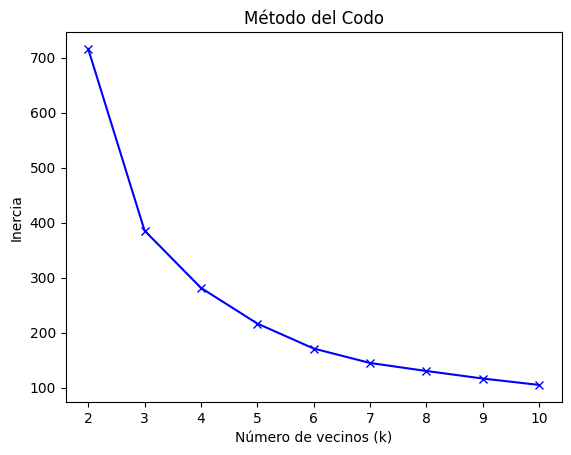

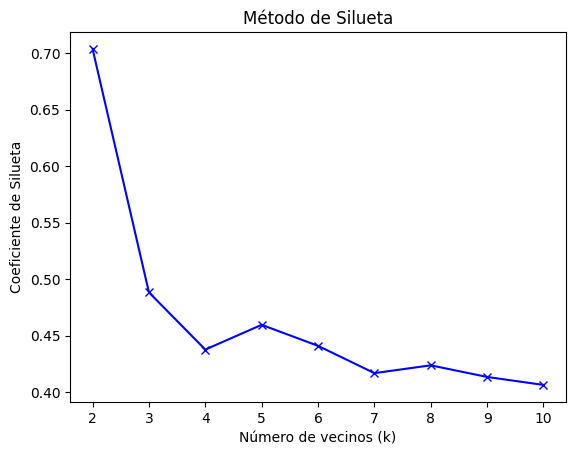

In [25]:



lista1 = []
lista2 = []


k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    lista1.append(kmeans.inertia_)
    lista2.append(silhouette_score(X_scaled, kmeans.labels_))


plt.plot(k_values, lista1, 'bx-')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

plt.plot(k_values, lista2, 'bx-')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método de Silueta')
plt.show()
